In [2]:
import pandas as pd
df = pd.read_csv(r"C:\Users\ans\IMDB Dataset.csv")
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ans\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ans\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


✅ Dataset loaded: (50000, 2)
                                              review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive
✅ Text cleaned
🎯 Accuracy: 88.78%

📊 Classification Report:
               precision    recall  f1-score   support

    negative       0.90      0.88      0.89      4961
    positive       0.88      0.90      0.89      5039

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



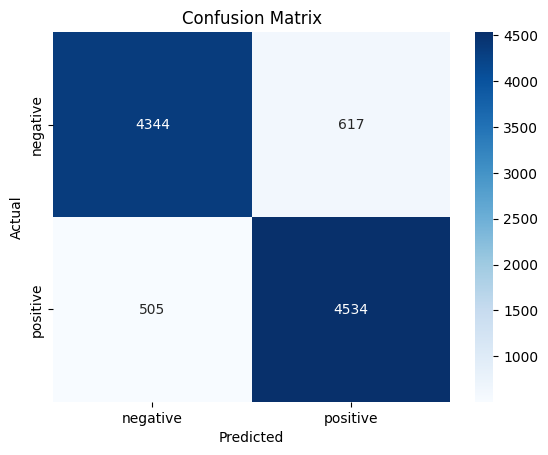

🔮 Review: The movie was boring and too long.
Prediction: ('negative', np.float64(0.9926471746671416))


In [3]:
# 📊 Sentiment Analysis Project - Minimal Version
# Author: Your Name

# 1. Install requirements (uncomment if running first time)
# !pip install pandas numpy scikit-learn nltk matplotlib seaborn wordcloud

import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

nltk.download("stopwords")
nltk.download("wordnet")

# ========================
# 2. Load Dataset
# ========================
# Either use IMDB_Dataset.csv or fallback sample
try:
   df = pd.read_csv(r"C:\Users\ans\IMDB Dataset.csv")
except:
    sample_data = {
        "review": [
            "This movie was absolutely wonderful!",
            "Terrible film, waste of time",
            "Great acting and storyline",
            "Boring and predictable plot",
            "Amazing cinematography and direction"
        ],
        "sentiment": ["positive", "negative", "positive", "negative", "positive"]
    }
    df = pd.DataFrame(sample_data)

print("✅ Dataset loaded:", df.shape)
print(df.head())

# ========================
# 3. Preprocessing
# ========================
stop_words = set(stopwords.words("english"))
lemmatizer = WordNetLemmatizer()

def clean_text(text):
    text = text.lower()
    text = re.sub(r"<[^>]+>", "", text)  # remove HTML
    text = re.sub(r"http\S+|www\S+", "", text)  # remove URLs
    text = re.sub(r"[^a-zA-Z\s]", "", text)  # keep only letters
    tokens = text.split()
    tokens = [lemmatizer.lemmatize(t) for t in tokens if t not in stop_words and len(t) > 2]
    return " ".join(tokens)

df["processed_review"] = df["review"].apply(clean_text)
print("✅ Text cleaned")

# ========================
# 4. Train/Test Split
# ========================
X = df["processed_review"]
y = df["sentiment"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# TF-IDF Vectorizer
tfidf = TfidfVectorizer(max_features=5000, ngram_range=(1,2))
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

# ========================
# 5. Model Training
# ========================
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train_tfidf, y_train)

y_pred = model.predict(X_test_tfidf)
acc = accuracy_score(y_test, y_pred)
print(f"🎯 Accuracy: {acc:.2%}")
print("\n📊 Classification Report:\n", classification_report(y_test, y_pred))

# ========================
# 6. Confusion Matrix
# ========================
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=model.classes_, yticklabels=model.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# ========================
# 7. Quick Prediction Function
# ========================
def predict_sentiment(text):
    text_clean = clean_text(text)
    vec = tfidf.transform([text_clean])
    pred = model.predict(vec)[0]
    prob = model.predict_proba(vec)[0].max()
    return pred, prob

# Test prediction
sample_review = "The movie was boring and too long."
print("🔮 Review:", sample_review)
print("Prediction:", predict_sentiment(sample_review))
